## 作業
### 請使用 application_train.csv, 根據不同的 HOUSETYPE_MODE 對 AMT_CREDIT 繪製 Histogram

# [作業目標]
- 試著調整資料, 並利用提供的程式繪製分布圖

# [作業重點]
- 如何將列出相異的 HOUSETYPE_MODE 類別 (In[3])
- 如何依照不同的 HOUSETYPE_MODE 類別指定資料, 並繪製長條圖(.hist())? (In[3])

In [16]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件

# 忽略警告訊息
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
# dir_data = './data/'
# f_app = os.path.join(dir_data, 'application_train.csv')
# print('Path of read in data: %s' % (f_app))

In [17]:
# 讀取檔案
app_train = pd.read_csv(r"C:\Users\user\100 days\data\application_train.csv")
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# 資料分群後排序
unique_house_type = app_train['HOUSETYPE_MODE'].unique()
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
app_train['HOUSETYPE_MODE']

0         block of flats
1         block of flats
2                    NaN
3                    NaN
4                    NaN
5                    NaN
6                    NaN
7                    NaN
8                    NaN
9                    NaN
10                   NaN
11                   NaN
12        block of flats
13        block of flats
14        block of flats
15                   NaN
16                   NaN
17                   NaN
18        block of flats
19                   NaN
20        block of flats
21                   NaN
22        block of flats
23        block of flats
24        block of flats
25        block of flats
26        block of flats
27                   NaN
28                   NaN
29        block of flats
               ...      
307481               NaN
307482    block of flats
307483    block of flats
307484               NaN
307485               NaN
307486    block of flats
307487               NaN
307488               NaN
307489    block of flats


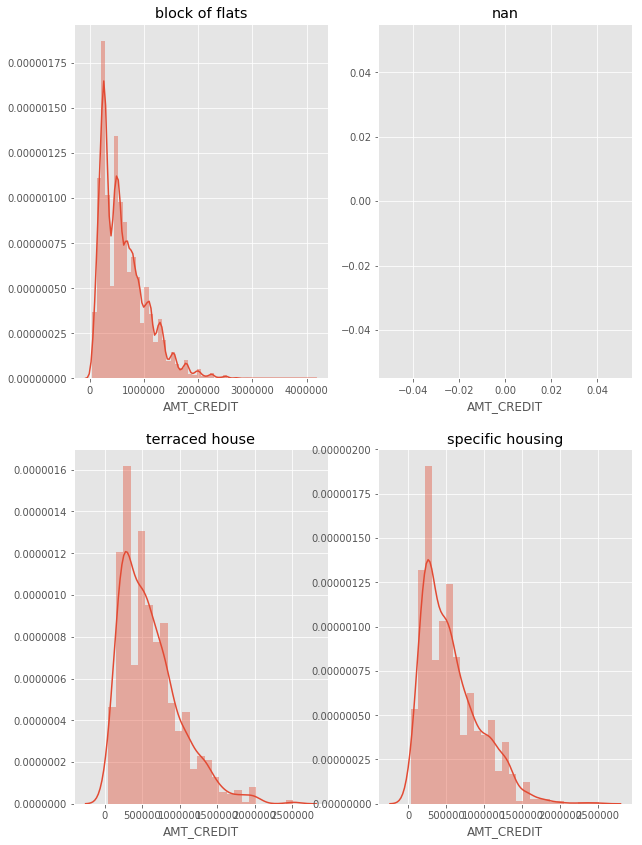

In [13]:
# 使用不同的 HOUSETYPE_MODE 類別繪製圖形, 並使用 subplot 排版

nrows = len(unique_house_type)
ncols = nrows // 2

plt.figure(figsize=(10,30))
for i in range(len(unique_house_type)):
    plt.subplot(nrows, ncols, i+1)
    sns.distplot(app_train.loc[(app_train['HOUSETYPE_MODE'] == unique_house_type[i]) & (app_train['TARGET'] == 0), 'AMT_CREDIT'], 
                 label = "TARGET = 0", hist = True)
    plt.title(str(unique_house_type[i]))
plt.show()

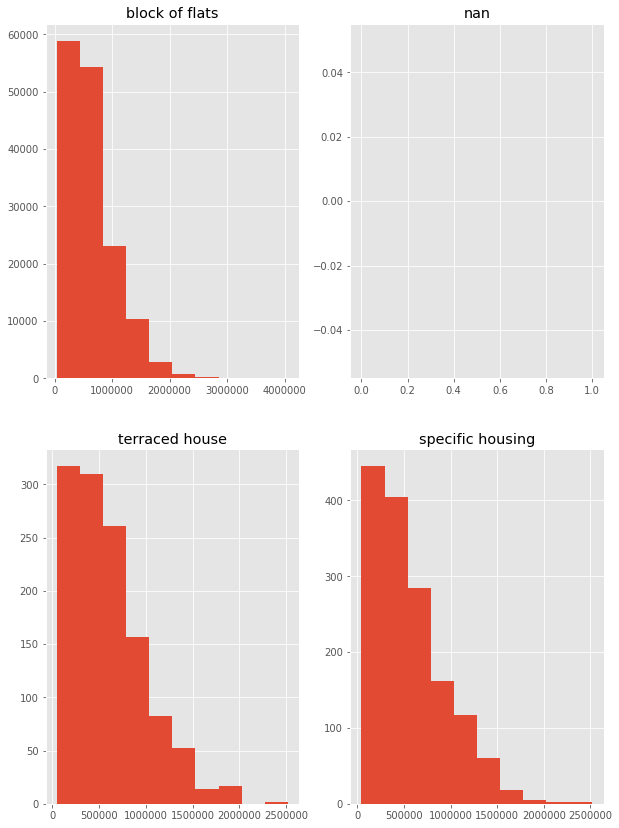

In [14]:
# 使用不同的 HOUSETYPE_MODE 類別繪製圖形, 並使用 subplot 排版
"""
Your Code Here
"""
unique_house_type = app_train['HOUSETYPE_MODE'].unique()

nrows = len(unique_house_type)
ncols = nrows // 2

plt.figure(figsize=(10,30))
for i in range(len(unique_house_type)):
    plt.subplot(nrows, ncols, i+1)
    """
    Your Code Here
    """
    app_train.loc[app_train['HOUSETYPE_MODE'] == unique_house_type[i], "AMT_CREDIT"].hist()
    plt.title(str(unique_house_type[i]))
plt.show()    

In [15]:
# 2019/09/22 待更新
# app_train.loc[,].hist() ...怎用?  畫出來不一樣...